# The Sparks Foundation-GRIP June 2021
<b>Author: Vinamra Mishra</b>

<b>Task 1: Predict the percentage of a student based on the number of study hours using supervised ML.</b>

Data: http://bit.ly/w-data 

In [2]:
#importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing and reading the dataset
data_set = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Discover the data set
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


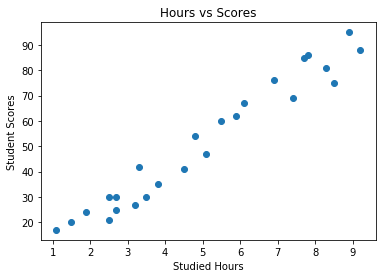

In [5]:
# Visualisation
plt.scatter(data_set["Hours"], data_set["Scores"])
plt.title("Hours vs Scores")
plt.xlabel("Studied Hours")
plt.ylabel("Student Scores")
plt.show()

## Train-Test splitting

In [76]:
x = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

## Simple linear regression model

In [120]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

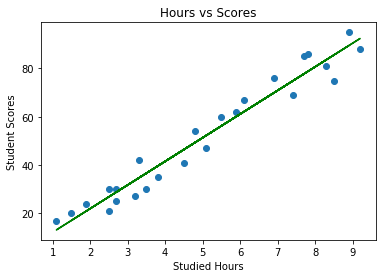

In [121]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color = "green");
plt.title("Hours vs Scores")
plt.xlabel("Studied Hours")
plt.ylabel("Student Scores")
plt.show()

In [122]:
predict = reg.predict(x_test)
predict

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [124]:
reg.score(x_test, y_test)

0.9568211104435257

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predict, y_test)

22.96509721270043

In [83]:
mean_absolute_error(predict, y_test)

4.419727808027652

In [84]:
#Comparing the actual values with the predicted ones.
ds = pd.DataFrame({'Actual score': y_test, 'Predicted score': predict})  
ds

,Actual score,Predicted score
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


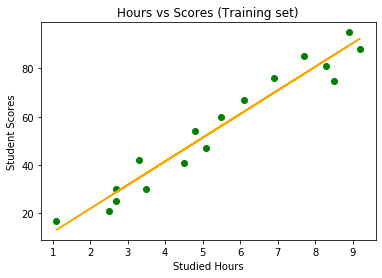

In [85]:
#Visualising the Training set results
plt.scatter(x_train, y_train, color = "green")
plt.plot(x_train, reg.predict(x_train), color = "orange")
plt.title("Hours vs Scores (Training set)")
plt.xlabel("Studied Hours")
plt.ylabel("Student Scores")
plt.show()

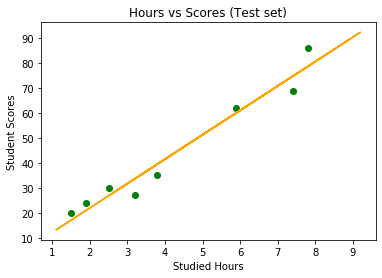

In [86]:
#Visualising the Test set results
plt.scatter(x_test, y_test, color = "green")
plt.plot(x_train, reg.predict(x_train), color = "orange")
plt.title("Hours vs Scores (Test set)")
plt.xlabel("Studied Hours")
plt.ylabel("Student Scores")
plt.show()

## Final Solution

In [87]:
#predicting the score
hours = [[9.25]]

In [125]:
score = reg.predict(hours)
print("Predicted score of student if he studies for 9.25 hours daily:", score)

predicted score of student if he studies for 9.25 hours daily: [92.91505723]
